# Chapter 3 : Adding Layers

Input with 4 features being fed to hidden layer with 3 neurons . 

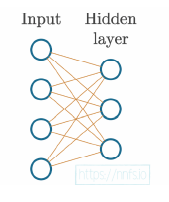

In [1]:
import numpy as np

# for input layer
inputs = [[ 1 , 2 , 3 , 2.5 ], 
          [ 2. , 5. , - 1. , 2 ], 
          [ - 1.5 , 2.7 , 3.3 , - 0.8 ]]
weights = [ [ 0.2 , 0.8 , - 0.5 , 1 ],
            [ 0.5 , - 0.91 , 0.26 , - 0.5 ],
            [ - 0.26 , - 0.27 , 0.17 , 0.87 ]]
biases = [ 2 , 3 , 0.5 ]

#for hidden layer 
weights2 = [[ 0.1 , - 0.14 , 0.5 ],
[ - 0.5 , 0.12 , - 0.33 ],
[ - 0.44 , 0.73 , - 0.13 ]]
biases2 = [ - 1 , 2 , - 0.5 ]

#output of layer 1 
layer1_output = np.dot(inputs , np.array(weights).T)+biases

#output of layer 2 
layer2_output = np.dot(layer1_output , np.array(weights2).T)+ biases2

print(layer2_output)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


#### Training data 

Instead of hand typing random data , lets use a function to create a no linear data . 

installing nnfs python package to get some datasets

In [9]:
! pip install nnfs 

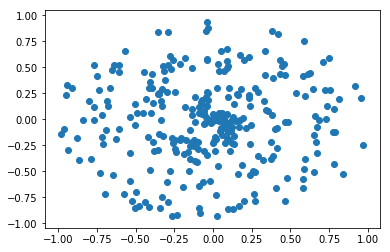

In [14]:
import numpy as np
import nnfs 
from nnfs.datasets import spiral_data

nnfs.init()

"""The nnfs.init() does three things: it sets the random seed to 0 (by the default), creates a
float32 dtype default, and overrides the original dot product from NumPy. All of these are meant
to ensure repeatable results for following along."""

import matplotlib.pyplot as plt
X, y = spiral_data( samples = 100 , classes = 3 )
plt.scatter(X[:, 0 ], X[:, 1 ])
plt.show()


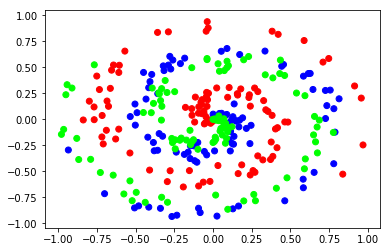

In [15]:
"""If you trace from the center, you can determine all 3 classes separately,
but this is a very challenging problem for a machine learning classifier to 
solve. Adding color to the chart makes this more clear:"""
plt.scatter(X[:, 0 ], X[:, 1 ], c = y, cmap = 'brg' )
plt.show()

### Dense Layer Class

Weights are often initialized randomly for a model , but if we want to load a pretrained model we should be able to do that . Next we have a forward method , which is called forward pass .  

we’re setting weights to be random and biases to be 0  

np.random.randn produces a Gaussian distribution with a mean of 0 and a variance of 1, which means that it’ll generate random numbers, positive and negative, centered at 0 and with the mean value close to 0.

In general, neural networks work bestwith values between -1 and +1 (still to be explained in the scope of this chapter ) . also we are multiplying the weights by 0.01 to generate numbers that are couple of magnitudes smaller so our model fits the data faster. 

Idea here is to start a model with non zero values small enough that they wont effect the training . 

In [17]:
print (np.random.randn( 2 , 5 )) # returns a 2*5 array

[[-0.13370156  1.0777438  -1.1268258  -0.7306777  -0.3848798 ]
 [ 0.09435159 -0.04217145 -0.2868872  -0.0616264  -0.10730527]]


In [18]:
print (np.zeros(( 2 , 5 )))

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [19]:
n_inputs = 2
n_neurons = 4
weights = 0.01 * np.random.randn(n_inputs, n_neurons)
biases = np.zeros(( 1 , n_neurons))
print (weights)
print (biases)

[[-0.00719604 -0.00812993  0.00274516 -0.00890915]
 [-0.01157355 -0.00312292 -0.00157667  0.02256723]]
[[0. 0. 0. 0.]]


In [20]:
#creating a dense layer class 

class Layer_dense : 
    def __init__(self , n_inputs,n_neurons):
        self.weights = 0.01*np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
    
    def forward(self, inputs): 
        self.output = np.dot(inputs , self.weights) + self.biases

In [21]:
#now lets use the above dense layer class with some data 

#create data 
X, y = spiral_data( samples = 100 , classes = 3 )

#create dense later inputs 2 and 3 output values 

dense1 = Layer_dense(2,3)

#forward pass through this layer 

dense1.forward(X)

print(dense1.output[:5])


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.3045461e-05  3.9499992e-05 -6.9049900e-05]
 [-2.6080908e-05  7.8847173e-05 -1.3832570e-04]
 [-2.9209632e-05  1.3542618e-04 -4.7619757e-05]
 [-4.9506609e-05  1.3208228e-04 -3.0261234e-04]]
